# **Laboratorijska vježba 6**: Zadaci za samostalni rad

## **Predviđanje preživaljvanja u potopu Titanika**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o putnicima Titanika te informaciju jesu li preživjeli potop. Ovaj skup podataka jedan od najpopularnijih skupova na stranici Kaggle jer dobro služi za uvođenje u rješavanje problema klasifikacije. Skup podataka sadrži sljedeće značajke:

* name - naziv putnika
* sex - spol putnika
* dob - dob putnika
* sibsp - broj braće/sestara/supružnika putnika na brodu
* parch - broj roditelja/djece putnika na brodu
* ticket - broj karte putnika
* fare - cijena karte putnika
* cabin - broj kabine putnika
* embarked - luka ukrcaja putnika

te izlaznu varijablu:

* survived - informacija je li putnik preživio katastrofu ili ne.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic = pd.read_csv('data/titanic.csv') #pd.read_excel('data/titanic.xls')
titanic.head(5)

,survived,surname,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,Allen,Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S
1,1,Allison,Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,0,Allison,Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,0,Allison,Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S


## **Zadatak 1: Istraživanje skupa podataka**

Istražite skup podataka na način da izračunate deskriptivnu statistiku za izlaznu varijablu. Prokomentirajte koji je udio preživjelih u potonuću Titanika.

In [4]:
# calculates descriptive statistics such as count, mean, standard deviation, minimum value, and maximum value

survived_statistics = titanic['survived'].describe()
print(survived_statistics)

survived_count = titanic['survived'].value_counts()[1]
print('Number of survivors:', survived_count)

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64
Number of survivors: 500


Nacrtajte dijagram raspršenosti između izlazne varijable i svakog pojedinog stupca u skupu podataka. Pomoć: možete koristiti matricu dijagrama raspršenosti iz biblioteke pandas.

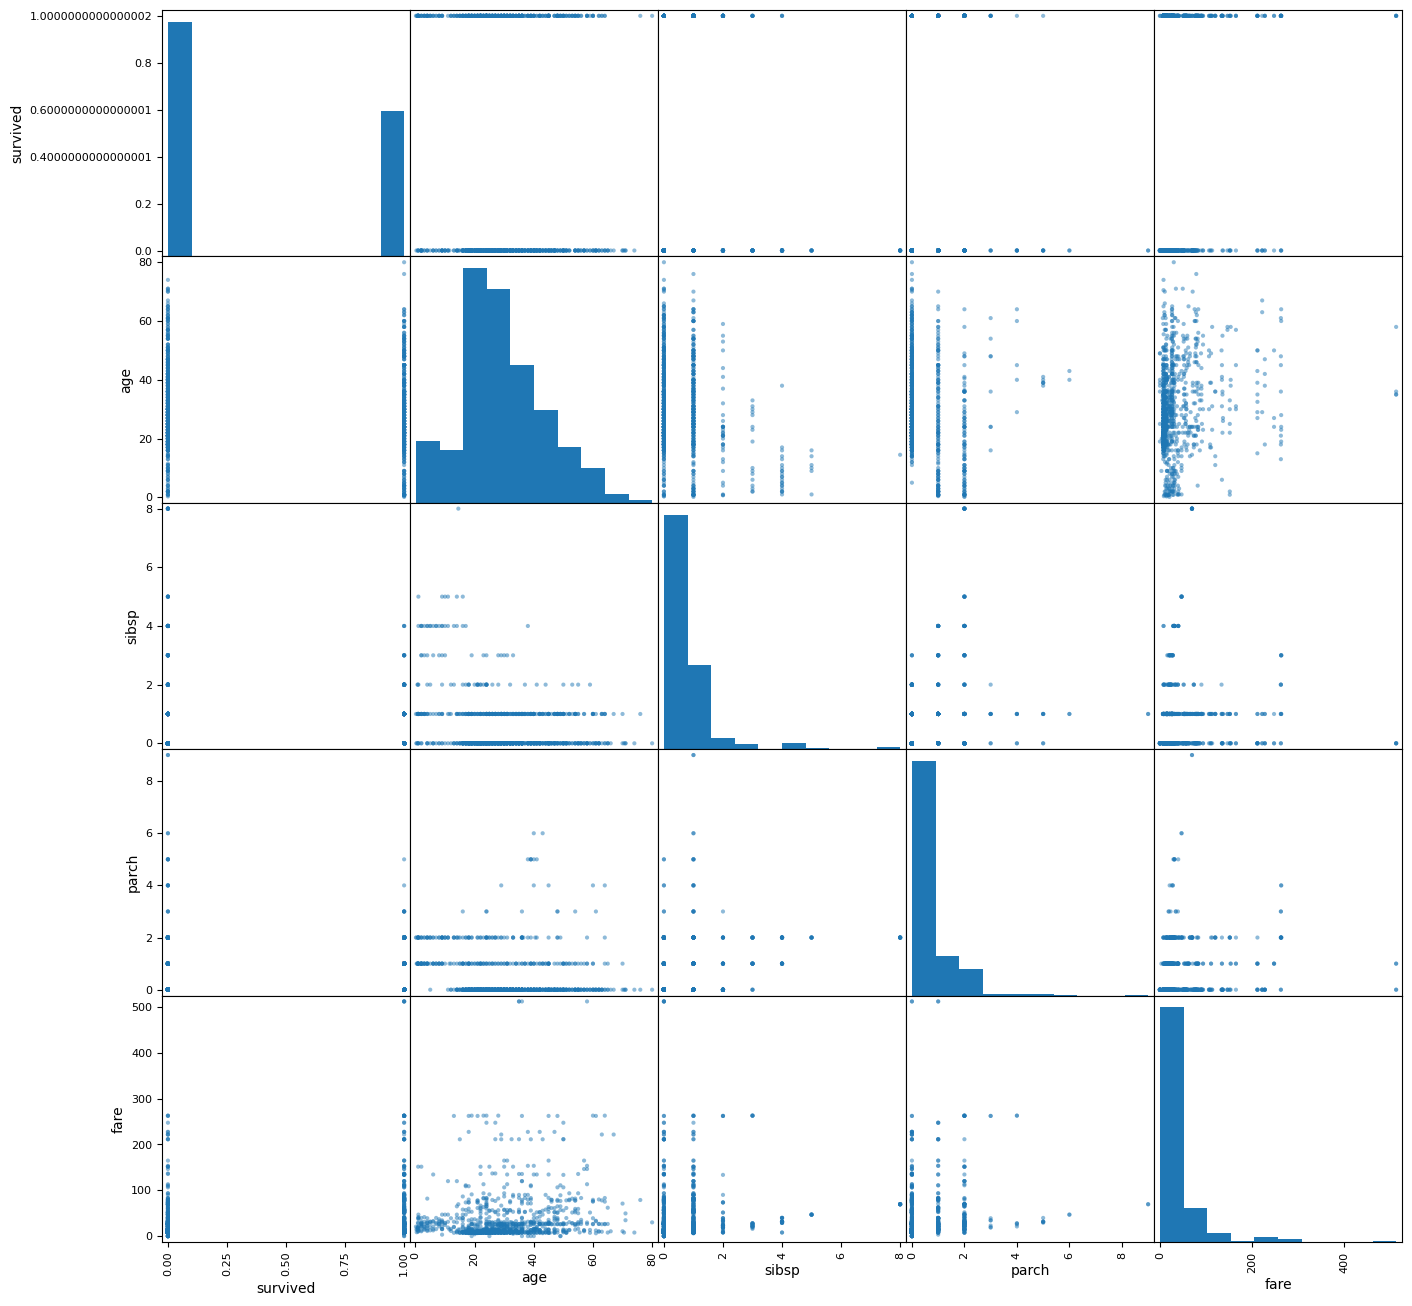

In [5]:
cols = ["survived", "age", "sibsp", "parch", "fare"]
pd.plotting.scatter_matrix(titanic[cols], figsize=(16, 16))
plt.show()

Odaberite značajke koje su po Vašem mišljenju bitne za klasifikaciju preživjelih i preminulih putnika. Kategoričke stupce pretvorite u numeričke pomoću *get_dummies()* funkcije iz biblioteke pandas. Provjerite ima li nedostajućih vrijednosti u nekom od stupaca te ih popunite na prikladan način (prosječna vrijednost, medijan, najčešća vrijednost,...). 

In [6]:
titanic_df = titanic

titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
titanic_df['survived'].fillna(0, inplace=True)
titanic_df.fillna(method='ffill', inplace=True)
X=titanic_df[['sex','age','sibsp','fare','embarked']]
y = titanic_df['survived']

X['sex'] = pd.get_dummies(X['sex'])['female']
X = pd.get_dummies(X, columns=['embarked'])
X

# titanic_df = pd.get_dummies(titanic, columns = input_variables)
# print(titanic_df)

#titanic_df.isnull().head()

# titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True) # nedostaje: 312

# nan_count_f = titanic_df['fare'].isna().sum()
# print(nan_count_f) #76

# titanic_df['fare'].fillna(titanic_df['fare'].median(), inplace=True)

# nan_count = titanic_df.isna().sum() 
# print(nan_count)


#embarked: C, Q, S
# num_C = titanic_df['embarked_C'].sum()
# num_Q = titanic_df['embarked_Q'].sum()
# num_S = titanic_df['embarked_S'].sum()
# print(num_C)
# print(num_Q)
# print(num_S)

#titanic['embarked'].fillna(titanic['embarked'])

<ipython-input-6-5d0693e2cf8a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = pd.get_dummies(X['sex'])['female']


,sex,age,sibsp,fare,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,211.3375,0,0,1
1,0,0.9167,1,151.5500,0,0,1
2,1,2.0000,1,151.5500,0,0,1
3,0,30.0000,1,151.5500,0,0,1
4,1,25.0000,1,151.5500,0,0,1
...,...,...,...,...,...,...,...
1304,1,14.5000,1,14.4542,1,0,0
1305,1,28.0000,1,14.4542,1,0,0
1306,0,26.5000,0,7.2250,1,0,0
1307,0,27.0000,0,7.2250,1,0,0


In [7]:
#Count NaN values in multiple columns of DataFrame
nan_count = titanic_df.isna().sum() 
print(nan_count)

survived    0
surname     0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64


Zatim podijelite skup podataka na trening i test (u omjeru 70-30). Pripazite na to da u podskupovima za trening i test bude jednak **omjer** preživjelih i preminulih putnika.

In [8]:
from sklearn.model_selection import train_test_split

data = titanic_df

count_survived = titanic_df['survived'].value_counts()[1]
print(count_survived)

#columns = titanic_df.columns.tolist()
#print(columns)
nan_count_s = titanic['sex'].isna().sum()
print(nan_count_s)

nan_count_s = X['age'].isna().sum()
print(nan_count_s)

#X = data.drop('survived',axis=1)
#titanic_df[['age', 'fare', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S']]#.to_numpy()
#y = titanic_df['survived']
# for e in y:
#   print(e)

# podijeli podatke u omjeru 70-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y)# , random_state = 1

notsurvived_y_train = y_train.value_counts()[0]
print(notsurvived_y_train)
notsurvived_y_test = y_test.value_counts()[0]
print(notsurvived_y_test)

500
0
0
566
243


## **Zadatak 2: Logistička regresija**

Na podskupu za trening istrenirajte model algoritma logističke regresije. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test. 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #, classsification_report
from sklearn.metrics import precision_recall_fscore_support

model = LogisticRegression()
model.fit(X_train,y_train)

y_test_p = model.predict( X_test )
print("CAC: {0}".format(accuracy_score(y_train, model.predict(X_train))))
print (" Tocnost: " , accuracy_score(y_train ,model.predict( X_train )))

print("CAC: {0}".format(accuracy_score(y_test, model.predict(X_test))))
print (" Tocnost: " , accuracy_score(y_test , y_test_p))

#compute per-label precisions, recalls, F1-scores and supports 
print('precisions, recalls, F1-scores and supports')
print(precision_recall_fscore_support(y_train, model.predict( X_train ), average=None,warn_for ='precision',labels=[0,1]))
print(precision_recall_fscore_support(y_test, y_test_p, average=None,warn_for ='precision',labels=[0,1]))

CAC: 0.7838427947598253
 Tocnost:  0.7838427947598253
CAC: 0.7684478371501272
 Tocnost:  0.7684478371501272
precisions, recalls, F1-scores and supports
(array([0.80976431, 0.73602484]), array([0.84982332, 0.67714286]), array([0.82931034, 0.70535714]), array([566, 350]))
(array([0.7992126 , 0.71223022]), array([0.83539095, 0.66      ]), array([0.81690141, 0.68512111]), array([243, 150]))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


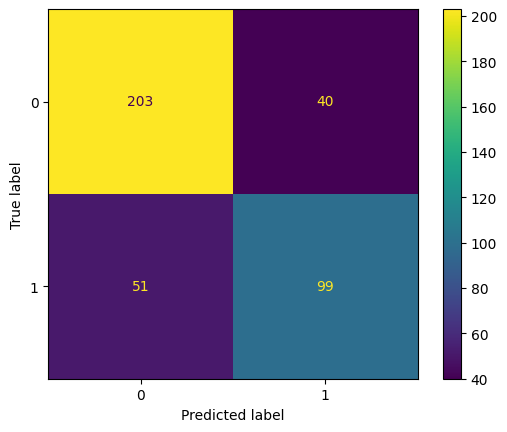

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)

c_matrix = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(c_matrix)
disp.plot()
plt.show()

Logistička regresija koristi prag vjerojatnosti kako bi odlučila u koju klasu treba svrstati primjerak. U nekim slučajevima, želimo razumjeti kako se model ponaša na različitim razinama ovog praga. Iscrtajte ROC krivulju na temelju stvarnih vrijednosti izlazne varijable i predviđenih vjerojatnosti oznaka klasa koje daje logistička regresija (*predict_proba*). Izračunajte površinu ispod krivulje, odnosno vrijednost mjere AUC. 

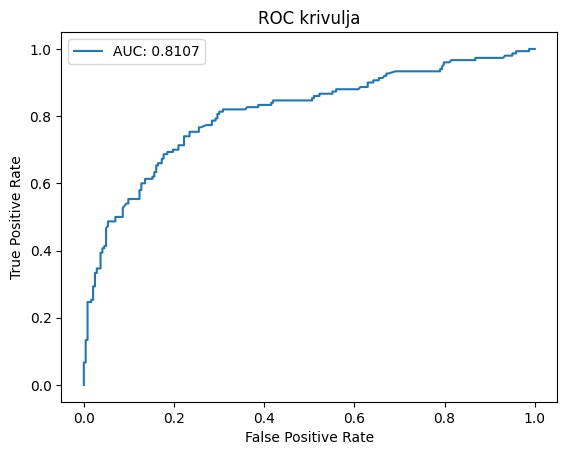

In [11]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc_score = auc(fpr,tpr)

plt.plot(fpr,tpr, label=f'AUC: {auc_score:.4f}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC krivulja')
plt.legend()
plt.show()

In [12]:
#y_test=y_test.astype('int32').dtypes
y_test
# for i in range(0,len(y)):
#   if (y[i] != '0') and (y[i] != '1'):
#     y[i]='0'
# y.unique()

#y_test.unique()
#Length: 393

819     1
603     1
568     0
222     0
418     0
       ..
950     0
244     0
1284    0
688     0
439     0
Name: survived, Length: 393, dtype: int64

## **Zadatak 3: Stroj potpornih vektora**

Na podskupu za trening istrenirajte model algoritma SVM s linearnom jezgrom. Ispišite jednadžbu granice između klasa te ju protumačite. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test.

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train,y_train)

#za pravac
w = model_SVM.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 90)  #age
yy = a * xx - (model_SVM.intercept_[0] - 0.5) / w[1]

# plt.scatter(titanic.query('survived==0')['age'], titanic.query('survived==0')['sibsp'],c='red')#nisu preživjeli
# plt.scatter(titanic.query('survived==1')['age'], titanic.query('survived==1')['sibsp'],c='green')#preživjeli
# plt.xlabel('age')
# plt.ylabel('sibsp')
# #plt.xlim([400, 3100])
# plt.xlim([0, 90])
# plt.ylim([0, 10])

# plt.plot(xx, yy, c='blue')
feature_cols = X_train.columns[:-1]


for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model_SVM.coef_[0][f], feature_cols[f]))
print(model_SVM.intercept_[0])


y_predicted= model_SVM.predict(X_train)
# print("Predviđene vrijednosti - train: ")
# print(y_predicted)
# print("Stvarne vrijednosti: ")
# print(list(y_train))#['survived']
print("CAC: {0}".format(accuracy_score(y_train, y_predicted)))
print('precisions, recalls, F1-scores and supports')
print(precision_recall_fscore_support(y_train, y_predicted, average=None,warn_for ='precision',labels=[0,1]))

2.0017280051293653 * sex + 
-0.00011943770616085203 * age + 
-0.0035720901738505173 * sibsp + 
8.76914166383358e-05 * fare + 
0.00018299477469163605 * embarked_C + 
0.00017769177362170208 * embarked_Q + 
-0.9984769424799795
CAC: 0.7805676855895196
precisions, recalls, F1-scores and supports
(array([0.80775717, 0.73065015]), array([0.84628975, 0.67428571]), array([0.82657463, 0.7013373 ]), array([566, 350]))


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model_SVM_test = SVC(kernel='linear')
model_SVM_test.fit(X_test,y_test)

#za pravac
w = model_SVM_test.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 90)  #age
yy = a * xx - (model_SVM_test.intercept_[0] - 0.5) / w[1]

feature_cols = X_test.columns[:-1]


for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model_SVM_test.coef_[0][f], feature_cols[f]))
print(model_SVM_test.intercept_[0])


y_predicted_test= model_SVM.predict(X_test)

print("CAC: {0}".format(accuracy_score(y_test, y_predicted_test)))
print('precisions, recalls, F1-scores and supports')
print(precision_recall_fscore_support(y_test, y_predicted_test, average=None,warn_for ='precision',labels=[0,1]))

2.0005391303369926 * sex + 
-3.222867735530599e-05 * age + 
-0.0007791563377832489 * sibsp + 
2.8117782093772803e-05 * fare + 
0.0006785701166593938 * embarked_C + 
-0.0008894919099606824 * embarked_Q + 
-1.0000547310851178
CAC: 0.7786259541984732
precisions, recalls, F1-scores and supports
(array([0.812     , 0.72027972]), array([0.83539095, 0.68666667]), array([0.82352941, 0.70307167]), array([243, 150]))


Istražite učinkovitost algoritma SVM s različitim jezgrama (polinomijalne s različitim stupnjem te radijalne funkcije). Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te usporedite rezultate u odnosu na rezultate dobivene s linearnom jezgrom.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm = SVC(kernel="poly", degree=2)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.6408296943231441
Test accuracy: 0.628498727735369
Train precision: 0.7441860465116279
Test precision: 0.625
Train recall: 0.09142857142857143
Test recall: 0.06666666666666667
Train F1: 0.1628498727735369
Test F1: 0.12048192771084337


In [16]:
svm = SVC(kernel="poly", degree=3)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.6451965065502183
Test accuracy: 0.6310432569974554
Train precision: 0.9032258064516129
Test precision: 0.8571428571428571
Train recall: 0.08
Test recall: 0.04
Train F1: 0.14698162729658792
Test F1: 0.07643312101910829


In [17]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.6670305676855895
Test accuracy: 0.6692111959287532
Train precision: 0.6573426573426573
Test precision: 0.6666666666666666
Train recall: 0.26857142857142857
Test recall: 0.26666666666666666
Train F1: 0.38133874239350907
Test F1: 0.3809523809523809


Istražite učinkovitost algoritma SVM sa složenijim jezgrama kada se pri njegovu treniranju koristi regularizacija. Isprobajte nekoliko vrijednosti za koeficijent regularizacije te prokomentirajte dobivene rezultate. 

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#oblici transformacije preko parametra kernel u klasi SVC = Najpoznatije transformacije (kod algoritma SVM ove transformacije još se zovu jezgre) jesu polinomijalna, sigmoid te radijalna funkcija

C=[2,5,7,9,15,25]

for c in C:
    
    # Train the model
    model = SVC(kernel="rbf", C=c)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Compute evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print evaluation metrics
    print(f'Evaluation metrics for {c}:')
    print(f'Accuracy: {acc:.2f}')
    print(f'Precision: {prec:.2f}')
    print(f'Recall: {rec:.2f}')
    print(f'F1-score: {f1:.2f}')

    # # Plot the decision boundary
    # colors = np.array(['green', 'red'])
    # plt.scatter(X_train['age'], X_train['sibsp'], c=colors[y_train])
    
    # plt.xlabel('age')
    # plt.ylabel('sibsp')

    # xx, yy = np.meshgrid(np.linspace(0, 90), np.linspace(0, 10))
    # Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Z = Z.reshape(xx.shape)
    # plt.contour(xx, yy, Z, colors='blue')
    # plt.show()

Evaluation metrics for 2:
Accuracy: 0.68
Precision: 0.70
Recall: 0.29
F1-score: 0.41
Evaluation metrics for 5:
Accuracy: 0.70
Precision: 0.71
Recall: 0.36
F1-score: 0.48
Evaluation metrics for 7:
Accuracy: 0.70
Precision: 0.70
Recall: 0.38
F1-score: 0.49
Evaluation metrics for 9:
Accuracy: 0.71
Precision: 0.71
Recall: 0.40
F1-score: 0.51
Evaluation metrics for 15:
Accuracy: 0.72
Precision: 0.70
Recall: 0.44
F1-score: 0.54
Evaluation metrics for 25:
Accuracy: 0.73
Precision: 0.72
Recall: 0.49
F1-score: 0.58


## **Zadatak 4: Algoritam najbližih susjeda**

Na podskupu za trening istrenirajte algoritam KNN s različitim postavkama parametra $k$. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

CAC_train=[]
CAC_test=[]

for n in range(1,11):
  model_knn = KNeighborsClassifier(n_neighbors=n)
  model_knn.fit(X_train,y_train)
  print(f'{n}:')
  print('Train:')
  CAC_train.append(accuracy_score(y_train, model_knn.predict(X_train)))
  print("CAC: {0}".format(accuracy_score(y_train,  model_knn.predict(X_train))))
  print('precisions, recalls, F1-scores and supports')
  print(precision_recall_fscore_support(y_train,   model_knn.predict(X_train), average=None,warn_for ='precision',labels=[0,1]))
  print('Test:')
  CAC_test.append(accuracy_score(y_test,  model_knn.predict(X_test)))
  print("CAC-test: {0}".format(accuracy_score(y_test,  model_knn.predict(X_test))))
  print('precisions, recalls, F1-scores and supports')
  print(precision_recall_fscore_support(y_test, model_knn.predict(X_test), average=None,warn_for ='precision',labels=[0,1]))
# za  k =  5 najbolji rezultati

1:
Train:
CAC: 0.9683406113537117
precisions, recalls, F1-scores and supports
(array([0.97354497, 0.95988539]), array([0.97526502, 0.95714286]), array([0.97440424, 0.95851216]), array([566, 350]))
Test:
CAC-test: 0.6437659033078881
precisions, recalls, F1-scores and supports
(array([0.70517928, 0.53521127]), array([0.72839506, 0.50666667]), array([0.71659919, 0.52054795]), array([243, 150]))
2:
Train:
CAC: 0.8395196506550219
precisions, recalls, F1-scores and supports
(array([0.79971388, 0.96774194]), array([0.98763251, 0.6       ]), array([0.88379447, 0.74074074]), array([566, 350]))
Test:
CAC-test: 0.6564885496183206
precisions, recalls, F1-scores and supports
(array([0.67197452, 0.59493671]), array([0.86831276, 0.31333333]), array([0.75763016, 0.41048035]), array([243, 150]))
3:
Train:
CAC: 0.8329694323144105
precisions, recalls, F1-scores and supports
(array([0.84705882, 0.80685358]), array([0.89045936, 0.74      ]), array([0.86821705, 0.77198212]), array([566, 350]))
Test:
CAC-tes

Iscrtajte ovisnost mjere CAC o veličini susjedstva ($k$) za podskupove za trening i test. Koristite linijski dijagram.

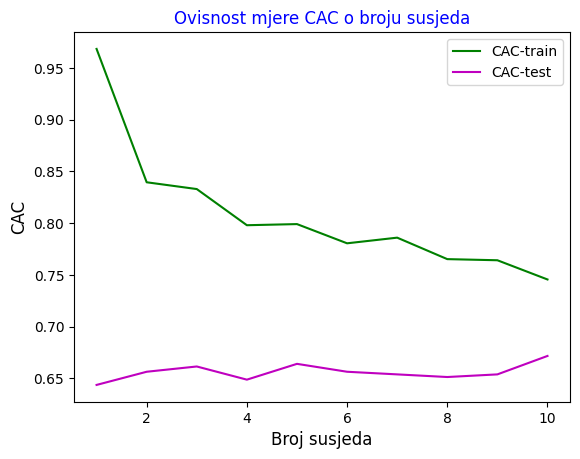

In [20]:
neighbors=[1,2,3,4,5,6,7,8,9,10]
plt.plot(neighbors, CAC_train, label='CAC-train',color='g')
plt.plot(neighbors, CAC_test, label='CAC-test',color='m')
plt.title('Ovisnost mjere CAC o broju susjeda', color='b')
plt.xlabel('Broj susjeda', fontsize=12)
plt.ylabel('CAC', fontsize=12)
plt.legend()
plt.show()

## **Zadatak 5: Stablo odluke**

Na podskupu za trening istrenirajte algoritam DT s različitim postavkama za dubinu stabla. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.



In [21]:
from sklearn import tree

CAC_train=[]
CAC_test=[]

for d in range(1,6):
  clf = tree.DecisionTreeClassifier(max_depth=d)
  clf = clf.fit(X_train, y_train)
  y_predict =clf.predict( X_test )
  print(f'{d}:')
  print('Train:')
  CAC_train.append(accuracy_score(y_train, clf.predict(X_train)))
  print("CAC: {0}".format(accuracy_score(y_train, clf.predict(X_train))))
  print('precisions, recalls, F1-scores and supports')
  print(precision_recall_fscore_support(y_train,  clf.predict(X_train), average=None,warn_for ='precision',labels=[0,1]))
  print('Test:')
  CAC_test.append(accuracy_score(y_test, clf.predict(X_test)))
  print("CAC-test: {0}".format(accuracy_score(y_test, clf.predict(X_test))))
  print('precisions, recalls, F1-scores and supports')
  print(precision_recall_fscore_support(y_test, y_predict, average=None,warn_for ='precision',labels=[0,1]))

#tree.plot_tree(clf)
#Za dubinu = 4 dobiju se najbolji rezultati 

1:
Train:
CAC: 0.7805676855895196
precisions, recalls, F1-scores and supports
(array([0.80775717, 0.73065015]), array([0.84628975, 0.67428571]), array([0.82657463, 0.7013373 ]), array([566, 350]))
Test:
CAC-test: 0.7786259541984732
precisions, recalls, F1-scores and supports
(array([0.812     , 0.72027972]), array([0.83539095, 0.68666667]), array([0.82352941, 0.70307167]), array([243, 150]))
2:
Train:
CAC: 0.7969432314410481
precisions, recalls, F1-scores and supports
(array([0.83216783, 0.73837209]), array([0.8409894 , 0.72571429]), array([0.83655536, 0.73198847]), array([566, 350]))
Test:
CAC-test: 0.7760814249363868
precisions, recalls, F1-scores and supports
(array([0.81893004, 0.70666667]), array([0.81893004, 0.70666667]), array([0.81893004, 0.70666667]), array([243, 150]))
3:
Train:
CAC: 0.8144104803493449
precisions, recalls, F1-scores and supports
(array([0.8390411 , 0.77108434]), array([0.86572438, 0.73142857]), array([0.85217391, 0.75073314]), array([566, 350]))
Test:
CAC-tes

Iscrtajte ovisnost mjere CAC o dubini stabla za podskupove za trening i test. Koristite linijski dijagram.

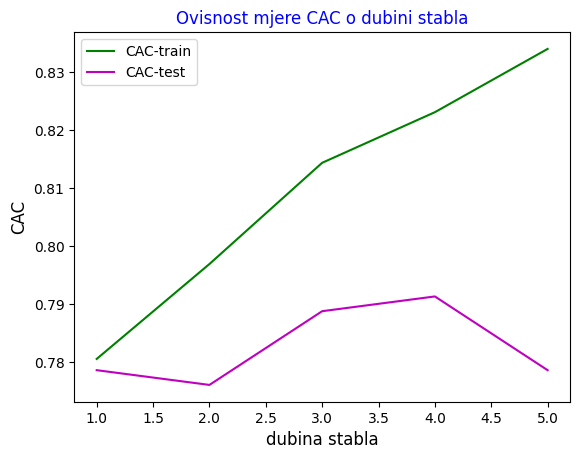

In [22]:
depth=[1,2,3,4,5]
plt.plot(depth, CAC_train, label='CAC-train',color='g')
plt.plot(depth, CAC_test, label='CAC-test',color='m')
plt.title('Ovisnost mjere CAC o dubini stabla', color='b')
plt.xlabel('dubina stabla', fontsize=12)
plt.ylabel('CAC', fontsize=12)
plt.legend()
plt.show()

#Najbolja je vrijednost za 4